In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('0TrainVal.csv',index_col=0,parse_dates=True)

In [3]:
TrainVal

,f1,f2,f3,f4,f5,f6
Timestamp,,,,,,
2017-08-17 00:00:00,46.0,38.0,43.9,121.0,65.0,87.0
2017-08-17 00:05:00,37.0,37.0,52.9,109.0,60.0,90.0
2017-08-17 00:10:00,45.0,43.0,39.0,105.0,61.0,87.0
2017-08-17 00:15:00,38.0,35.0,36.2,109.0,68.0,102.0
2017-08-17 00:20:00,36.0,30.0,30.0,94.0,61.0,93.0
...,...,...,...,...,...,...
2018-03-04 23:35:00,46.0,41.0,70.0,118.0,64.0,52.0
2018-03-04 23:40:00,39.0,37.0,53.0,93.0,43.0,28.0
2018-03-04 23:45:00,48.0,54.0,45.0,94.0,39.0,16.0


# Feature Engineering

## Split to Training and Test Data

In [4]:
len(TrainVal)

57600

In [5]:
train = TrainVal
test = TrainVal

# Visualizations

In [6]:
# Pearson correlation coefficient
TrainVal.corr()

,f1,f2,f3,f4,f5,f6
f1,1.000000,0.983176,0.686837,0.653079,0.645445,0.629578
f2,0.983176,1.000000,0.739226,0.706630,0.698112,0.674337
f3,0.686837,0.739226,1.000000,0.973407,0.945193,0.869327
f4,0.653079,0.706630,0.973407,1.000000,0.965012,0.871574
f5,0.645445,0.698112,0.945193,0.965012,1.000000,0.881585
f6,0.629578,0.674337,0.869327,0.871574,0.881585,1.000000


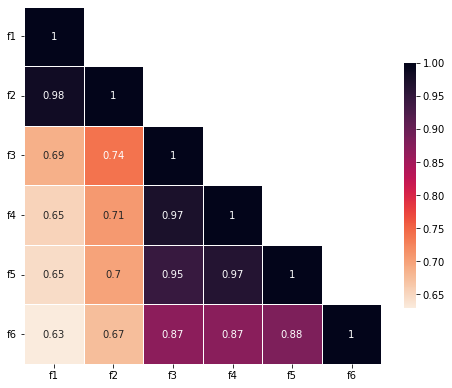

In [7]:
# The above as a plot

corr = TrainVal.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

In [8]:
# Typical week flow data for visualization
typWeek1 = train[(train.index.month == 9) & (train.index.day >= 4) & (train.index.day <= 10)]
typWeek2 = train[(train.index.month == 11) & (train.index.day >= 13) & (train.index.day <= 19)]
typWeek3 = train[(train.index.month == 1) & (train.index.day >= 15) & (train.index.day <= 21)]
typWeek4 = test[(test.index.month == 2) & (test.index.day >= 19) & (test.index.day <= 25)]

In [9]:
typWeek1.index = range(len(typWeek1))
typWeek2.index = range(len(typWeek2))
typWeek3.index = range(len(typWeek3))
typWeek4.index = range(len(typWeek4))

In [10]:
typWeek3 # Typical week flow data

,f1,f2,f3,f4,f5,f6
0,48.0,50.0,29.2,80.0,33.0,12.0
1,39.0,39.0,28.0,107.0,43.0,5.0
2,39.0,34.0,67.0,125.0,43.0,21.0
3,35.0,27.0,44.0,104.0,46.0,5.0
4,39.0,35.0,4.0,86.0,37.0,5.0
...,...,...,...,...,...,...
2011,48.0,47.0,54.0,88.0,26.0,5.0
2012,43.0,40.0,7.0,82.0,34.0,5.0
2013,45.0,41.0,55.7,79.0,38.0,7.0
2014,37.0,33.0,17.0,83.0,29.0,5.0


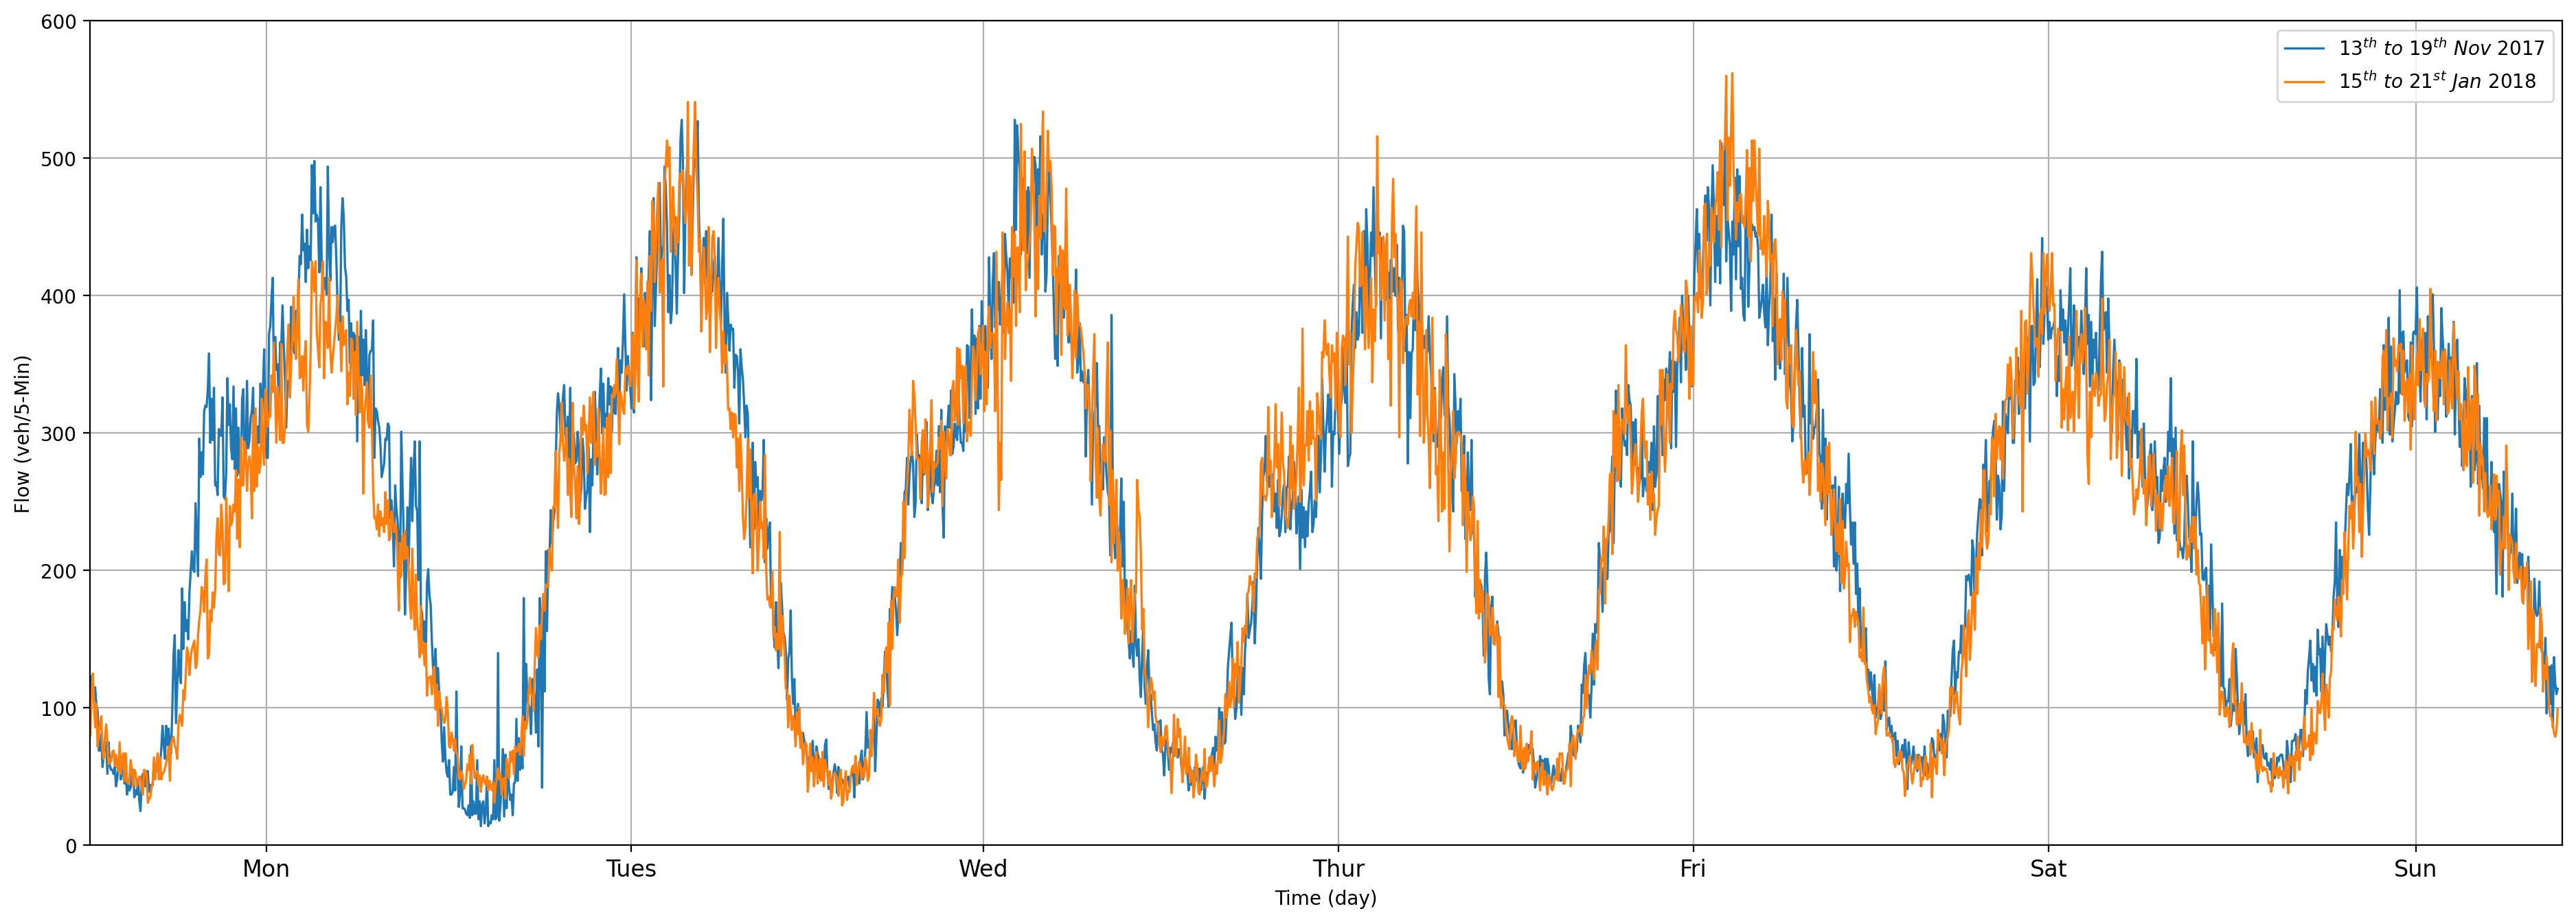

In [11]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6), dpi=200)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# x axis
x = np.linspace(0,2016,2016)

# Plot on that set of axes
axes.plot(x,typWeek2['f4'], lw=1.2, label=r'$13^{th}\ to\ 19^{th}\ Nov\ 2017$')
axes.plot(x,typWeek3['f4'], lw=1.2, label=r'$15^{th}\ to\ 21^{st}\ Jan\ 2018$')

axes.set_xlim(0,2020)
axes.set_ylim(0,600)
axes.set_xlabel('Time (day)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144, 442, 730, 1020, 1310, 1600, 1900])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], fontsize = 12)

plt.show()

In [12]:
typday1 = train[(train.index.month == 1) & (train.index.day == 15)]
typday2 = train[(train.index.month == 1) & (train.index.day == 16)]
typday3 = train[(train.index.month == 1) & (train.index.day == 17)]
typday4 = train[(train.index.month == 1) & (train.index.day == 18)]
typday5 = train[(train.index.month == 1) & (train.index.day == 19)]

In [13]:
typday6 = train[(train.index.month == 1) & (train.index.day == 20)]
typday7 = train[(train.index.month == 1) & (train.index.day == 21)]

In [14]:
typday1.index = range(len(typday1))
typday2.index = range(len(typday2))
typday3.index = range(len(typday3))
typday4.index = range(len(typday4))
typday5.index = range(len(typday5))
typday6.index = range(len(typday6))
typday7.index = range(len(typday7))

In [15]:
typday1

,f1,f2,f3,f4,f5,f6
0,48.0,50.0,29.2,80.0,33.0,12.0
1,39.0,39.0,28.0,107.0,43.0,5.0
2,39.0,34.0,67.0,125.0,43.0,21.0
3,35.0,27.0,44.0,104.0,46.0,5.0
4,39.0,35.0,4.0,86.0,37.0,5.0
...,...,...,...,...,...,...
283,37.0,30.0,49.0,117.0,44.0,6.0
284,34.0,27.0,5.0,87.0,34.0,5.0
285,50.0,46.0,52.6,112.0,61.0,5.0
286,38.0,32.0,19.0,101.0,48.0,5.0


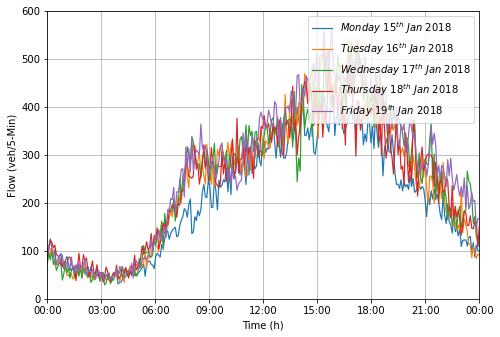

In [16]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,typday1['f4'], lw=1.2, label=r'$Monday\ 15^{th}\ Jan\ 2018$')
axes.plot(x,typday2['f4'], lw=1.2, label=r'$Tuesday\ 16^{th}\ Jan\ 2018$')
axes.plot(x,typday3['f4'], lw=1.2, label=r'$Wednesday\ 17^{th}\ Jan\ 2018$')
axes.plot(x,typday4['f4'], lw=1.2, label=r'$Thursday\ 18^{th}\ Jan\ 2018$')
axes.plot(x,typday5['f4'], lw=1.2, label=r'$Friday\ 19^{th}\ Jan\ 2018$')

axes.set_xlim(0,24)
axes.set_ylim(0,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

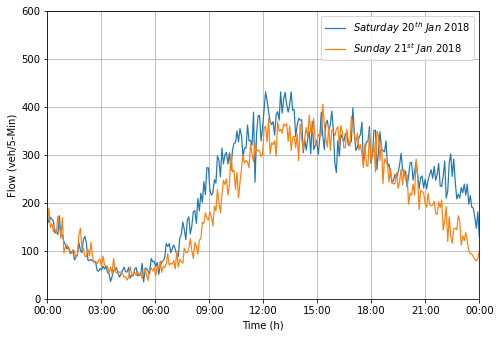

In [17]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# map timestamp to a variable x
x = np.linspace(0,288,288)

# Plot on that set of axes
axes.plot(x,typday6['f4'], lw=1.2, label=r'$Saturday\ 20^{th}\ Jan\ 2018$')
axes.plot(x,typday7['f4'], lw=1.2, label=r'$Sunday\ 21^{st}\ Jan\ 2018$')

axes.set_xlim(0,24)
axes.set_ylim(0,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

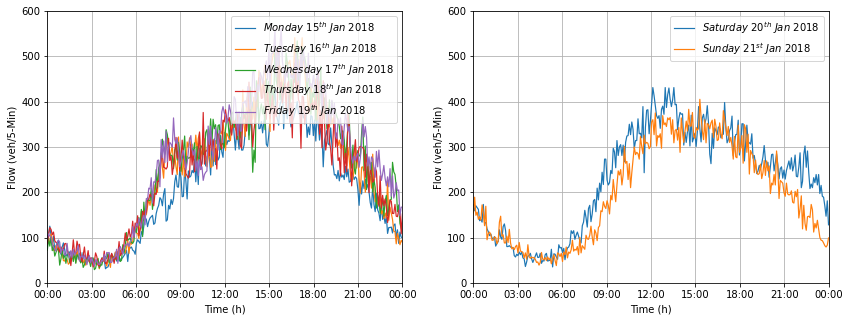

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

axes[0].plot(x,typday1['f4'], lw=1.2, label=r'$Monday\ 15^{th}\ Jan\ 2018$')
axes[0].plot(x,typday2['f4'], lw=1.2, label=r'$Tuesday\ 16^{th}\ Jan\ 2018$')
axes[0].plot(x,typday3['f4'], lw=1.2, label=r'$Wednesday\ 17^{th}\ Jan\ 2018$')
axes[0].plot(x,typday4['f4'], lw=1.2, label=r'$Thursday\ 18^{th}\ Jan\ 2018$')
axes[0].plot(x,typday5['f4'], lw=1.2, label=r'$Friday\ 19^{th}\ Jan\ 2018$')

axes[1].plot(x,typday6['f4'], lw=1.2, label=r'$Saturday\ 20^{th}\ Jan\ 2018$')
axes[1].plot(x,typday7['f4'], lw=1.2, label=r'$Sunday\ 21^{st}\ Jan\ 2018$')

for i in range(0,2):
    axes[i].set_xlim(0,24)
    axes[i].set_ylim(0,600)
    axes[i].set_xlabel('Time (h)')
    axes[i].set_ylabel('Flow (veh/5-Min)')

    axes[i].legend(loc=1)
    axes[i].grid()

    axes[i].set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
    axes[i].set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])
    
plt.show()

In [19]:
week = pd.DataFrame()

In [20]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week = pd.concat([typday1['f4'],typday2['f4'],typday3['f4'],typday4['f4'],typday5['f4'],typday6['f4'],typday7['f4']], 
                 axis = 1, ignore_index = True)
week.columns = days

In [21]:
week

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,80.0,93.0,72.0,86.0,100.0,172.0,154.0
1,107.0,89.0,97.0,108.0,108.0,159.0,189.0
2,125.0,92.0,81.0,122.0,103.0,170.0,149.0
3,104.0,108.0,100.0,118.0,102.0,166.0,156.0
4,86.0,97.0,71.0,106.0,87.0,162.0,140.0
...,...,...,...,...,...,...,...
283,117.0,109.0,157.0,146.0,203.0,189.0,88.0
284,87.0,98.0,172.0,160.0,205.0,170.0,82.0
285,112.0,84.0,131.0,161.0,148.0,147.0,79.0
286,101.0,94.0,120.0,108.0,167.0,181.0,83.0


<AxesSubplot:>

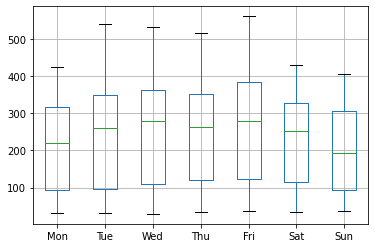

In [22]:
week.boxplot()

#### Heatmap

In [23]:
df = TrainVal.groupby([TrainVal.index.weekday,TrainVal.index.hour,
                       TrainVal.index.minute]).mean()['f4']

In [24]:
df

Timestamp  Timestamp  Timestamp
0          0          0             88.678571
                      5             90.892857
                      10            95.214286
                      15            88.678571
                      20            87.714286
                                      ...    
6          23         35           111.275862
                      40           112.551724
                      45           105.068966
                      50           100.137931
                      55            96.896552
Name: f4, Length: 2016, dtype: float64

In [25]:
df.values

array([ 88.67857143,  90.89285714,  95.21428571, ..., 105.06896552,
       100.13793103,  96.89655172])

In [26]:
index = []

for x in df.index:
    index.append(x[0])

In [27]:
df1 = pd.DataFrame(data=df.values, index=index, columns=['mean'])

In [28]:
# Pivot the dataframe to desired format

In [29]:
x = 0
y = 0
z = []

for i in df1.index:
    if i == x:
        y+=1
        z.append(y)
    elif i != x:
        x = i
        y = 0
        y+=1
        z.append(y)

In [30]:
df1['day'] = df1.index
df1['Time'] = z

In [31]:
df2 = df1.pivot(index='Time',columns='day',values='mean')

In [32]:
df2.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='day')

In [33]:
df2.rename(columns={  
            0  : 'Mon',
            1  : 'Tue',
            2  : 'Wed',
            3  : 'Thu',
            4  : 'Fri',
            5  : 'Sat',
            6  : 'Sun'
                   },  
           inplace=True
          )

In [34]:
df2.T

Time,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
day,,,,,,,,,,,,,,,,,,,,,
Mon,88.678571,90.892857,95.214286,88.678571,87.714286,81.964286,80.000000,79.750000,76.535714,79.928571,...,131.392857,123.285714,123.357143,115.214286,108.642857,112.250000,100.785714,97.250000,94.071429,89.571429
Tue,87.464286,89.821429,88.250000,83.928571,75.714286,68.678571,68.571429,66.250000,67.928571,71.642857,...,158.000000,142.071429,139.321429,133.892857,124.750000,129.357143,123.607143,111.464286,104.464286,100.928571
Wed,98.392857,99.535714,96.250000,94.000000,85.392857,78.178571,75.821429,72.928571,70.928571,80.071429,...,160.928571,156.250000,149.821429,148.000000,131.928571,138.678571,131.000000,121.750000,113.142857,101.892857
Thu,97.000000,98.310345,98.448276,96.620690,91.344828,83.724138,79.206897,78.310345,75.827586,79.275862,...,177.517241,171.448276,162.896552,152.517241,148.586207,160.517241,148.206897,142.724138,129.655172,128.310345
Fri,120.206897,129.862069,130.103448,118.758621,112.655172,100.827586,94.413793,90.482759,91.344828,88.310345,...,214.965517,227.793103,211.896552,201.689655,201.517241,218.275862,204.448276,194.310345,188.931034,185.551724
Sat,176.586207,187.689655,182.655172,175.551724,166.793103,160.448276,148.655172,145.344828,135.793103,138.344828,...,212.551724,219.689655,212.068966,209.206897,192.448276,192.758621,194.931034,180.896552,176.379310,174.862069
Sun,171.000000,159.034483,164.689655,158.827586,161.000000,148.206897,136.068966,143.034483,137.586207,135.965517,...,146.586207,137.586207,129.344828,124.379310,117.275862,111.275862,112.551724,105.068966,100.137931,96.896552


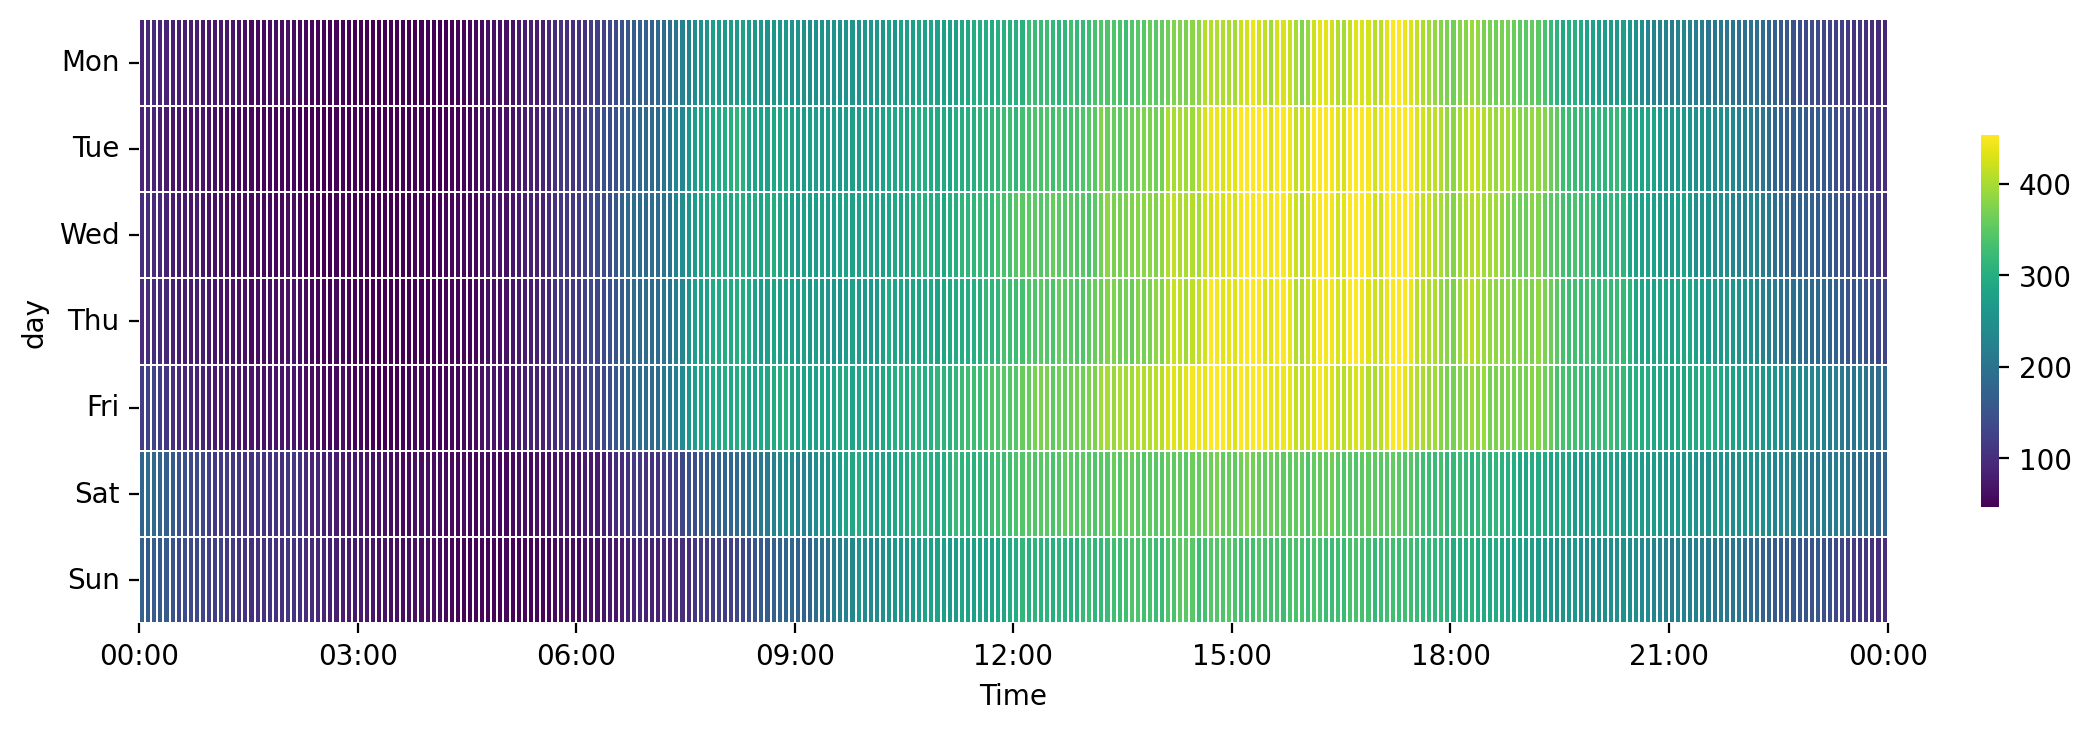

In [35]:
plt.figure(figsize=(12,4), dpi=200)
hmap = sns.heatmap(df2.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                  linewidth=0.05
                 )
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
hmap.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);

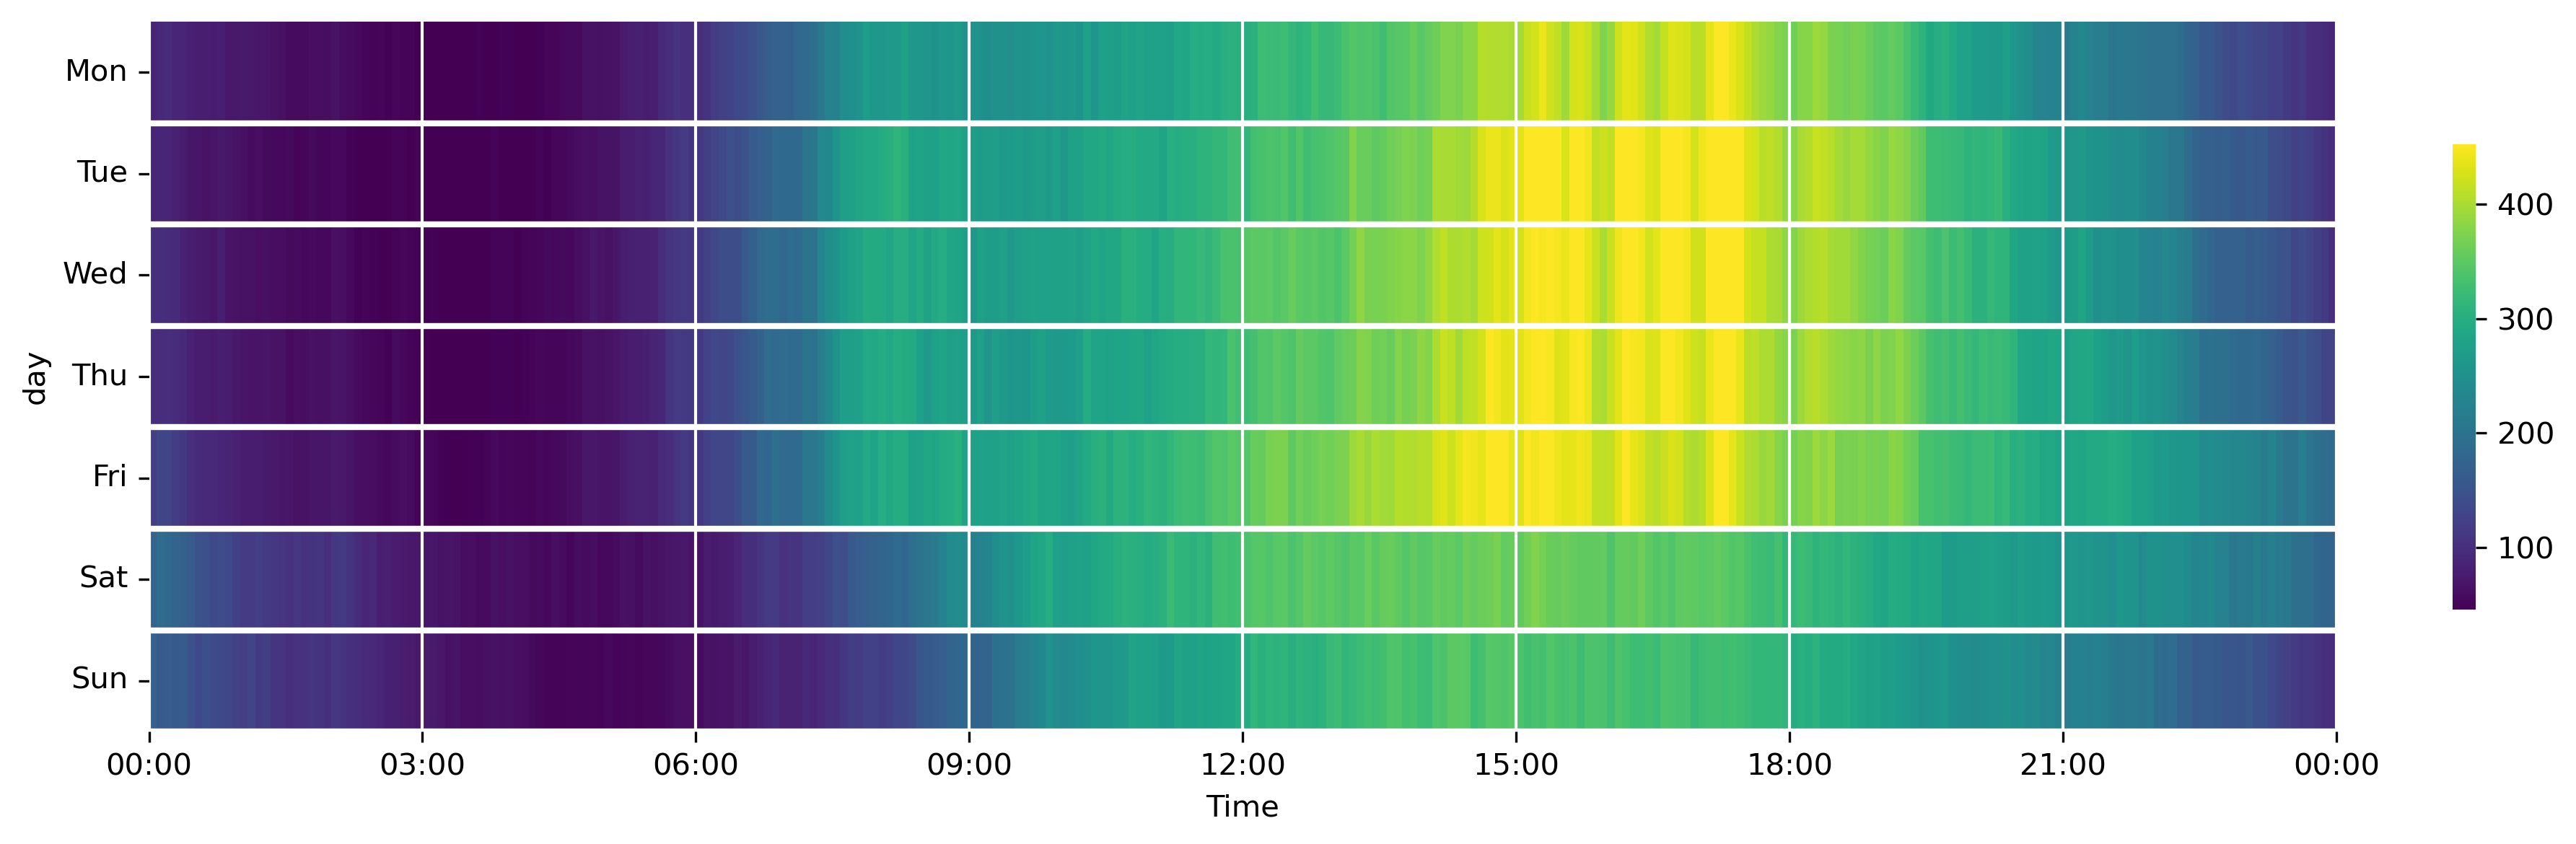

In [36]:
plt.figure(figsize=(12,4), dpi=300)

ticks = [0, 36, 72, 108, 144, 180, 216, 252, 288]
hmap = sns.heatmap(df2.T,
                  xticklabels=False,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                 )


for i in range(1,df2.T.shape[0]+1):
    hmap.axhline(i, color='white', lw=2)
for j in ticks:
    hmap.axvline(j, color='white', lw=1)
    
    
hmap.set_yticklabels(hmap.get_yticklabels(), rotation=0);
hmap.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288]);
hmap.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.tight_layout()
plt.show()